In [45]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np

Papel = input("ingresar ticker, Recordar que si es BCBA se tiene que poner .BA: ")
timeframe = input("Ingresar timeframe,1m,2m,5m,15m,30m,60m,90m,1h,1d,5d")

#Papel = "GGAL"
#timeframe = "1h"

MA1 = int(input("Ingresar media que tiene que superior al resto: ")) 
MA2 = int(input("Ingresar primera media a comparar: "))
MA3 = int(input("Ingresar segunda media a comparar: "))
MA4 = int(input("Ingresar tercera media a comparar: "))

#MA1 = 9
#MA2 = 18
#MA3 = 30
#MA4 = 50


if timeframe == "1m" or timeframe == "2m" or timeframe == "5m":
    fecha = dt.date.today() - dt.timedelta(days=7)
elif timeframe == "15m" or timeframe == "30m" or timeframe == "60m" or timeframe == "90m" or timeframe == "1h":
    fecha = dt.date.today() - dt.timedelta(days=59)
else:
    fecha= dt.date.today() - dt.timedelta(days=700)
    
ticker = yf.download( Papel , start = fecha , end = dt.date.today() ,interval=timeframe,)

ticker ["sma_1"] = ticker["Adj Close"].rolling(MA1).mean()
ticker ["sma_2"] = ticker["Adj Close"].rolling(MA2).mean()
ticker ["sma_3"] = ticker["Adj Close"].rolling(MA3).mean()
ticker ["sma_4"] = ticker["Adj Close"].rolling(MA4).mean()

##ticker ["FLAG"].iloc[-1] = 0


ticker ["BUY/SELL"] = np.where((ticker ["sma_1"] > ticker ["sma_2"]) & 
                               (ticker ["sma_1"] > ticker ["sma_3"]) & 
                               (ticker ["sma_1"] > ticker ["sma_4"]), "BUY", "SELL")

##ticker ["FLAG"] = np.where((ticker["BUY/SELL"].shift(1) == "-" ), "BUY", "SELL")


ticker ["BUY/SELL"] = np.where((ticker ["sma_3"] < ticker ["sma_4"]) & 
                               (ticker ["BUY/SELL"] == "BUY") , "SELL", "BUY")

ticker ["Operar"] = np.where(ticker["BUY/SELL"] != ticker["BUY/SELL"].shift(1), "Operar","")

ticker ["Posicion"] = "0"

ticker ["Posicion"] = np.where((ticker["Posicion"] == "0") & 
                               (ticker["BUY/SELL"] == "BUY"), "1","0")

#ticker ["Posicion"] = np.where((ticker["BUY/SELL"] == "SELL") &
#                               (ticker["Operar"] == "Operar") &
#                               (ticker["Posicion"].shift(1) == "1"), "-7","9")

##ticker ["Posicion"] = np.where((ticker ["Posicion"] == "1") & 
##                               (ticker ["Posicion"].shift(1) == "1") & 
##                               (ticker["BUY/SELL"] == "SELL"), "-1","0")



ticker ["Total Compras"] = np.where( (ticker["Operar"] == "Operar") & (ticker["BUY/SELL"] == "BUY") ,  ticker ["Adj Close"].round(2) *-1, 0)
ticker ["Total Ventas"] = np.where( (ticker["Operar"] == "Operar") & (ticker["BUY/SELL"] == "SELL") , ticker ["Adj Close"].round(2)*1, 0)

ticker.iloc[0, 9] = "pepo"

ticker = ticker.drop (["Open","High","Low", "Close"], axis= 1)
#ticker ["Total Compras"].iloc[-1] = 0
#ticker ["Total Ventas"].iloc[-1] = 0
##ticker = ticker [::-1].dropna()


pd.options.display.max_rows = None
ticker.dropna()



ingresar ticker, Recordar que si es BCBA se tiene que poner .BA: GGAL
Ingresar timeframe,1m,2m,5m,15m,30m,60m,90m,1h,1d,5d1h
Ingresar media que tiene que superior al resto: 9
Ingresar primera media a comparar: 18
Ingresar segunda media a comparar: 30
Ingresar tercera media a comparar: 50
[*********************100%***********************]  1 of 1 completed


Adj Close   Volume      sma_1      sma_2      sma_3      sma_4  \
Date                                                                         
2020-08-11    11.8800   513383  12.255567  12.456983  12.511823  12.727344   
2020-08-11    12.0500   225957  12.321245  12.498095  12.536157  12.727944   
2020-08-11    12.2200    59201  12.386800  12.532761  12.567490  12.728044   
2020-08-11    12.3100   106747  12.419256  12.554983  12.595157  12.724044   
2020-08-11    12.2900    67103  12.444522  12.575539  12.630823  12.720644   
2020-08-11    12.3100   217407  12.498967  12.589983  12.664490  12.718044   
2020-08-11    12.3500   123684  12.559522  12.601650  12.689157  12.714044   
2020-08-10    12.4400    95251  12.603967  12.615539  12.715157  12.709844   
2020-08-10    12.4501   147405  12.633967  12.619428  12.741490  12.703244   
2020-08-10    12.4711    64779  12.658400  12.623589  12.777320  12.695042   
2020-08-10    12.6400    84758  12.674944  12.626861  12.818283  12.685822   
2020-08-10    12.5121    82711  12.678722  12.625750  12.863617  12.672022   
2020-08-10    12.5374   132302  12.690711  12.635078  12.924740  12.660580   
2020-08-10    12.7800   190220  12.706555  12.639111  12.949827  12.646832   
2020-08-07    12.8550    94825  12.681000  12.650778  12.973160  12.637632   
2020-08-07    12.7500    56235  12.643778  12.661611  12.992660  12.627232   
2020-08-07    12.7100   179545  12.627111  12.696611  12.998383  12.619832   
2020-08-07    12.6700   216893  12.604889  12.729389  12.972383  12.610116   
2020-08-07    12.6200   144636  12.588778  12.750500  12.943050  12.599916   
2020-08-07    12.6740   124799  12.578778  12.778833  12.917383  12.589916   
2020-08-07    12.6200   133464  12.572778  12.809722  12.894917  12.585836   
2020-08-06    12.6800   200067  12.579445  12.860000  12.871250  12.577836   
2020-08-06    12.5500    99137  12.571667  12.916667  12.850417  12.571036   
2020-08-06    12.5200   107046  12.620556  12.997222  12.832750  12.568036   
2020-08-06    12.6000    52050  12.679444  13.098656  12.820083  12.565036   
2020-08-06    12.5100   627389  12.766111  13.136989  12.805417  12.559836   
2020-08-06    12.5250        0  12.853889  13.190878  12.792083  12.557236   
2020-08-06    12.5300   299914  12.912222  13.241711  12.779250  12.561336   
2020-08-05    12.6200   249352  12.978889  13.263472  12.765250  12.566336   
2020-08-05    12.6800   225744  13.046667  13.225139  12.745917  12.570936   
2020-08-05    12.6100   341662  13.140555  13.175694  12.723587  12.573036   
2020-08-05    12.9900   167798  13.261667  13.133472  12.701587  12.578836   
2020-08-05    13.0500   221059  13.373889  13.078472  12.666587  12.578336   
2020-08-05    13.3800   186783  13.517867  13.015139  12.626587  12.574018   
2020-08-05    13.3000   421230  13.507867  12.941528  12.591253  12.565618   
2020-08-04    13.0500   463109  13.527867  12.870417  12.559087  12.548818   
2020-08-04    13.1300   555231  13.571200  12.819861  12.536753  12.537418   
2020-08-04    13.2300   625052  13.548055  12.765972  12.506560  12.526218   
2020-08-04    13.5250   486580  13.403611  12.703750  12.470893  12.515218   
2020-08-04    13.7000   503545  13.210833  12.626806  12.424060  12.499718   
2020-08-04    14.0000   770186  13.005278  12.538472  12.383060  12.480918   
2020-08-04    14.3458  1867422  12.783056  12.429583  12.323727  12.454698   
2020-08-03    13.2900   421804  12.512411  12.299822  12.256867  12.417382   
2020-08-03    13.4800   577943  12.375189  12.225378  12.227200  12.402482   
2020-08-03    13.4400   892644  12.212967  12.139822  12.190200  12.379782   
2020-08-03    12.9217   511130  12.068522  12.051489  12.153533  12.364882   
2020-08-03    11.9300   107722  11.983889  12.018061  12.135477  12.364148   
2020-08-03    11.7900    96297  12.003889  12.040561  12.162143  12.381130   
2020-08-03    11.8500   495669  12.042778  12.073339  12.195143  12.388930   
2020-07-31    12.0000   161589  12

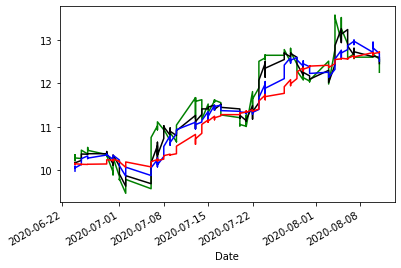

In [46]:
ticker.sma_1.plot(color="green")
ticker.sma_2.plot(color="black")
ticker.sma_3.plot(color="blue")
ticker.sma_4.plot(color="red")

In [47]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np

Papel = ["BBAR","BMA","SUPV","CEPU","CRESY","EDN","GGAL","IRS","PAM","TX","TEO","YPF","LOMA"]

timeframe = ["5m","15m","30m","1h","1d"]

MA1 = int(input("Ingresar media que tiene que superior al resto: ")) 
MA2 = int(input("Ingresar primera media a comparar: "))
MA3 = int(input("Ingresar segunda media a comparar: "))
MA4 = int(input("Ingresar tercera media a comparar: "))
lista = []
for a in Papel:
    lista.append(a)
    for n in timeframe:
        lista.append(n)
        if n == "1m" or n == "2m" or n == "5m":
            fecha = dt.date.today() - dt.timedelta(days=7)
        elif n == "15m" or n == "30m" or n == "60m" or n == "90m" or n == "1h":
            fecha = dt.date.today() - dt.timedelta(days=59)
        else:
            fecha= dt.date.today() - dt.timedelta(days=300)
    
        ticker = yf.download( a , start = fecha , end = dt.date.today() ,interval=n,)
    
        ticker ["sma_1"] = ticker["Adj Close"].rolling(MA1).mean()
        ticker ["sma_2"] = ticker["Adj Close"].rolling(MA2).mean()
        ticker ["sma_3"] = ticker["Adj Close"].rolling(MA3).mean()
        ticker ["sma_4"] = ticker["Adj Close"].rolling(MA4).mean()


        ticker ["BUY/SELL"] = np.where((ticker ["sma_1"] > ticker ["sma_2"]) & 
                          (ticker ["sma_1"] > ticker ["sma_3"]) & 
                          (ticker ["sma_1"] > ticker ["sma_4"]) , "BUY", "SELL")
        

        ticker ["BUY/SELL"] = np.where((ticker ["sma_3"] < ticker ["sma_4"]) & 
                                       (ticker ["BUY/SELL"] == "BUY") , "SELL", "BUY")
        
        ticker ["Operar"] = np.where(ticker["BUY/SELL"] != ticker["BUY/SELL"].shift(1), "Operar","")

        ticker ["Total Compras"] = np.where( (ticker["Operar"] == "Operar") & (ticker["BUY/SELL"] == "BUY") ,  ticker ["Adj Close"].round(2) *-1, 0)
        ticker ["Total Ventas"] = np.where( (ticker["Operar"] == "Operar") & (ticker["BUY/SELL"] == "SELL") , ticker ["Adj Close"].round(2)*1, 0)


        ticker = ticker.drop (["Open","High","Low", "Close"], axis= 1)
      
        
        pd.options.display.max_rows = None
        ticker.dropna()

        Resultado_operacion = (ticker ["Total Compras"].sum() + ticker ["Total Ventas"].sum())/ ticker["Adj Close"][0]
        lista.append(Resultado_operacion.round(2))
        
print(lista)

Ingresar media que tiene que superior al resto: 9
Ingresar primera media a comparar: 18
Ingresar segunda media a comparar: 30
Ingresar tercera media a comparar: 50
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*******